**Sentiment Analysis on Twitter Data**

In [2]:
#importing the necessary libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
plt.style.use('fivethirtyeight')


In [3]:
#Load the Data
from google.colab import files
file_uploaded = files.upload()

Saving login.csv to login.csv


In [4]:
# get the data
log = pd.read_csv("login.csv")

In [5]:
# Get the API credentials
consumer_key = log['keys'][0]
consumer_secret = log['keys'][1]
access_token = log['keys'][2]
access_token_secret = log['keys'][3]


In [7]:
# Authentication Object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Set Access Token and Access Token Secret
auth.set_access_token(access_token, access_token_secret) 

# Create API
api = tweepy.API(auth, wait_on_rate_limit = True)

In [8]:
# Extract 1000 tweets from the twitter user
tweets = api.user_timeline(screen_name = "WHO", count = 100, tweet_mode = "extended", lang = "en")

# print last 10 tweets from this account
print("Show recent 10 tweets: \n")
for i,tweet in enumerate(tweets[0:11], 1):
  print(str(i) + ". " + tweet.full_text + "\n")

Show recent 10 tweets: 

1. What have we learned about #airpollution and #COVID19? 
@DrMariaNeira explains in #ScienceIn5 this week ⬇️ https://t.co/vc6sON00xy

2. Ageism affects people of all ages.
It has detrimental costs on our health, wellbeing, social systems and our economy.
It’s time for change.

Download our guide to start the conversation and help create #AWorld4AllAges 👇

3. Nearly 3 in 4 children 👧🧒 (300 million) aged 2-4 years regularly suffer physical punishment and/or psychological violence at the hands of parents and caregivers.
 
It's time to #EndViolence against children. https://t.co/JXPU8nGn9E

4. Ageism affects people of all ages. 

It’s affecting our health, wellbeing, our social systems and our economy.

It’s time for change.
 
Help us create #AWorld4AllAges

5. #HealthWorkers should minimize the need for violence survivors to repeatedly tell their history: Always listen attentively when 👩👨🧒 recount their stories and don’t interpret or judge.
#EndViolence https://t

In [9]:
# Dataframe for tweets
df = pd.DataFrame([tweet.full_text for tweet in tweets], columns = ["Posted Tweets"])

# first 5 tweets in dataframe
df.head()

,Posted Tweets
0,What have we learned about #airpollution and #...
1,Ageism affects people of all ages.\nIt has det...
2,Nearly 3 in 4 children 👧🧒 (300 million) aged 2...
3,Ageism affects people of all ages. \n\nIt’s af...
4,#HealthWorkers should minimize the need for vi...


In [10]:
# Text cleaning

def clean_text(text):
  text = re.sub(r'#', '', text)
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'RT[\s]+','', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'_', '', text)
  text = re.sub(r'&amp', '', text)
  text = re.sub(r'https:?\/\/\S+', '', text)
  
  return text

df['Posted Tweets'] = df['Posted Tweets'].apply(clean_text)
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df


,Posted Tweets
0,What have we learned about airpollution and CO...
1,Ageism affects people of all ages.\nIt has det...
2,Nearly 3 in 4 children (300 million) aged 2-4...
3,Ageism affects people of all ages. \n\nIts aff...
4,HealthWorkers should minimize the need for vio...
...,...
95,"""We expect and demand that all our staff at ..."
96,"""This is a dark day for WHO. But by shining ..."
97,"""The conduct it describes is a sickening bet..."
98,"""I struggle to find the words to describe my..."


In [11]:
# subjectivity function
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Polarity Function:
def polarity(text):
  return TextBlob(text).sentiment.polarity

# Subjectivity and Polarity Columns
df['Subjectivity'] = df['Posted Tweets'].apply(subjectivity)
df['Polarity'] = df['Posted Tweets'].apply(polarity)

# New dataframe with subjectivity and polarity
df

,Posted Tweets,Subjectivity,Polarity
0,What have we learned about airpollution and CO...,0.000000,0.000000
1,Ageism affects people of all ages.\nIt has det...,0.066667,0.033333
2,Nearly 3 in 4 children (300 million) aged 2-4...,0.223956,0.000000
3,Ageism affects people of all ages. \n\nIts aff...,0.066667,0.033333
4,HealthWorkers should minimize the need for vio...,0.900000,0.400000
...,...,...,...
95,"""We expect and demand that all our staff at ...",0.833333,0.500000
96,"""This is a dark day for WHO. But by shining ...",0.550000,0.125000
97,"""The conduct it describes is a sickening bet...",0.625000,-0.400000
98,"""I struggle to find the words to describe my...",0.333333,0.250000


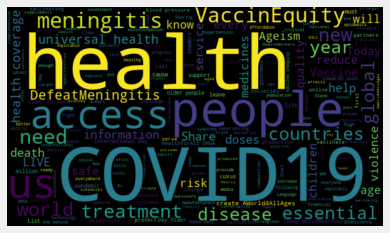

In [12]:
# Word cloud

words = ' '.join([twts for twts in df['Posted Tweets']])
wordcloud = WordCloud(width = 600, height = 350, random_state = 21, max_font_size = 119).generate(words)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [13]:
# negative, neutral and positive analysis

def analysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(analysis)
df

,Posted Tweets,Subjectivity,Polarity,Analysis
0,What have we learned about airpollution and CO...,0.000000,0.000000,Neutral
1,Ageism affects people of all ages.\nIt has det...,0.066667,0.033333,Positive
2,Nearly 3 in 4 children (300 million) aged 2-4...,0.223956,0.000000,Neutral
3,Ageism affects people of all ages. \n\nIts aff...,0.066667,0.033333,Positive
4,HealthWorkers should minimize the need for vio...,0.900000,0.400000,Positive
...,...,...,...,...
95,"""We expect and demand that all our staff at ...",0.833333,0.500000,Positive
96,"""This is a dark day for WHO. But by shining ...",0.550000,0.125000,Positive
97,"""The conduct it describes is a sickening bet...",0.625000,-0.400000,Negative
98,"""I struggle to find the words to describe my...",0.333333,0.250000,Positive


In [14]:
# print positive tweets
j=1
sortedDF= df.sort_values(by=['Polarity'])

for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+ '. ' +sortedDF['Posted Tweets'][i])
    print()
    j = j+1

1. Ageism affects people of all ages.
It has detrimental costs on our health, wellbeing, social systems and our economy.
Its time for change.

Download our guide to start the conversation and help create AWorld4AllAges 

2. Ageism affects people of all ages. 

Its affecting our health, wellbeing, our social systems and our economy.

Its time for change.
 
Help us create AWorld4AllAges

3. HealthWorkers should minimize the need for violence survivors to repeatedly tell their history Always listen attentively when  recount their stories and dont interpret or judge.
EndViolence 

4. You can't put out half a fire.
 
No one is safe until we're all safe. Stand up for VaccinEquity!



5. People who are at higher risk of domestic violence  during and after COVID19 include
Children
Women
Older people
 
We must EndViolence! 

6. If you are experiencing violence at home during COVID19 and need to leave in a hurry
 Identify a friend, neighbor, relative or shelter you can go to
 Plan how to get the

In [15]:
# negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')

for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+ '. ' +sortedDF['Posted Tweets'][i])
    print()
    j = j + 1

1.  Missing the 10% COVID19 vaccination target is a global failure that must spur us all to do all we can to vaccinate
- 40% of

2.  In May,  set the world a VaccinEquity challenge to vaccinate at least 10% of the population of every country against C

3. Do you believe all people should have access to the health services without suffering financial hardship?
Then get ready for Universal Health Coverage Day on 12.12.21! Join the call for leaders to invest in health systems that leave no one behind  

4. It's International TranslationDay 

Did you know WHO offers  online courses in 56 languages on COVID19 ; other health topics?

Start learning in your language on our OpenWHO platform today!
 

5. This is how you can prevent high blood pressure
Reduce Salt to less than 5g/day
Avoid saturated fats ; trans fats 
Don't 
Reduce 
Eat  and  regularly
Be active 
 
 

WorldHeartDay  

6. The number of adults aged 30-79 living with hypertension has doubled from 650 million to 1.28 billion since 1

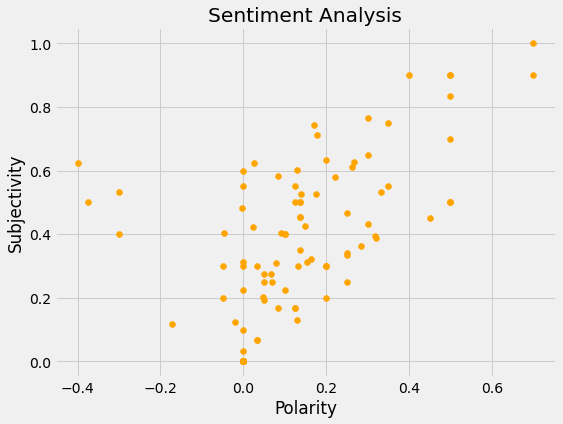

In [16]:
# Plot polarity and subjectivity

plt.figure(figsize= (8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color= 'Orange')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [26]:
# Percentage of positive tweets
positive_tweets = df[df.Analysis == 'Positive']
positive_tweets = positive_tweets['Posted Tweets']

pos = round((positive_tweets.shape[0] / df.shape[0]) * 100 , 1)
pos

69.0

In [28]:
# Percentage of negative tweets
negative_tweets = df[df.Analysis == 'Negative']
negative_tweets = negative_tweets['Posted Tweets']

neg = round((negative_tweets.shape[0] / df.shape[0]) * 100 , 1)
neg

10.0

In [27]:
# Percentage of neutral tweets
neutral_tweets = df[df.Analysis == 'Neutral']
neutral_tweets = neutral_tweets['Posted Tweets']

neu = round((neutral_tweets.shape[0] / df.shape[0]) * 100 , 1)
neu

21.0

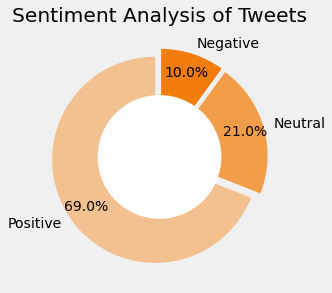

In [53]:
# Visualization of positive, neutral and negative tweet (in percentage)
labels = ['Positive', 'Neutral', 'Negative']
sizes = [pos, neu, neg]
colors = ['#f3c190','#f29d4a', '#f37d0c']
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, explode = explode, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.81)


centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.title('Sentiment Analysis of Tweets')
plt.show()



